<a href="https://colab.research.google.com/github/leandro095/GIS-Heatmap-popolazione-ferrovie/blob/main/HEATMAP_popolazione_ferrovie_Italia_1991.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HEATMAP

In [ ]:
from google.colab import files
import mapclassify as mc
uploaded = files.upload()  # seleziona il PDF appena scaricato
pdf_path = list(uploaded.keys())[0]

Saving RML0050288Pop_res_cens_1861_1991.pdf to RML0050288Pop_res_cens_1861_1991.pdf


In [ ]:
tables = tabula.read_pdf(
    pdf_path,
    pages="265-405", # prendo solo le pagine che mi interessano
    multiple_tables=True,
    stream=True,
    guess=True,   # aiuta per la struttura delle tabelle
)

# Fare un Check per vedere se le tabelle sono estratte correttamente prima di concatenare il tutto
if not tables:
    print("Warning: No tables were found in the PDF. Please check the PDF content or try different tabula parameters.")
    df_all = pd.DataFrame() # Dataframe vuoto per evitare errori
else:
    df_all = pd.concat(tables, ignore_index=True)

Nov 27, 2025 11:25:53 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2025 11:25:55 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Nov 27, 2025 11:25:55 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Nov 27, 2025 11:25:55 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Nov 27, 2025 11:25:55 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Nov 27, 2025 11:25:55 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Nov 27, 2025 11:25:55 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Nov 27, 2025 11:25:55 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Nov 27, 2025 11:25:55 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Nov 27, 2025 11:25:55 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Nov 27, 2025 11:25:55 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacter

In [ ]:
# prime 20 righe
df_all.head(20)

,0,1,2,3,4,5,6,7,8,9,...,725,726,727,728,729,730,731,732,733,734
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001,Agliè',NaN,NaN,NaN,NaN,3.945,4.089,3.647,3.428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,002,Airasca •,NaN,NaN,NaN,NaN,1.541,1.515,1.429,1.251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,003,Ala di Stura,•,NaN,NaN,NaN,1.037,1.048,978,803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,004,Albiano d'Ivrea,NaN,NaN,NaN,NaN,2.153,2.155,2.289,2.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,005,Alice Superiore,NaN,•,NaN,NaN,1.471,1.423,1.410,1.154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,006,Almese',NaN,NaN,NaN,NaN,2.75,2.848,2.849,3.046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,007,Alpette,NaN,NaN,NaN,NaN,892.0,933.0,1.026,901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,008,Alpignano,NaN,NaN,NaN,NaN,1.862,1.886,2.198,2.808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,009,Andezeno,NaN,NaN,NaN,NaN,1.246,1.3,1.170,1.295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_all.columns = list(range(df_all.shape[1]))

In [ ]:
# Nomi delle colonne
df = df_all[[1, 19]].copy()
df.columns = ["comune_raw", "pop_1991_raw"]

In [ ]:
import numpy as np
import pandas as pd

# eliminare righe completamente vuote
df = df.dropna(how="all")

# pulire nomi comuni (togle codici/numeri iniziali, spazi, punti)
df["comune"] = (
    df["comune_raw"]
    .astype(str)
    .str.replace(r"^\s*\d+\s*", "", regex=True)  # toglie "001 " ecc.
    .str.replace(r"\s*•\s*$", "", regex=True)    # toglie eventuali pallini in coda
    .str.strip()
)

# pulire popolazione 1991 (togliere punti come separatore migliaia)
df["pop_1991"] = (
    df["pop_1991_raw"]
    .astype(str)
    .str.replace(r"[.\s]", "", regex=True)
)

df["pop_1991"] = pd.to_numeric(df["pop_1991"], errors="coerce").astype("Int64")

# Tengo solo le righe con comune e popolazione valida
df = df.dropna(subset=["comune", "pop_1991"])
df = df[df["comune"].str.strip() != ""].copy()

df = df[["comune", "pop_1991"]]
df.head(20)

,comune,pop_1991
1,Agliè',2623
2,Airasca,3252
3,Ala di Stura,5030
4,Albiano d'Ivrea,1701
5,Alice Superiore,6010
6,Almese',524
7,Alpette,3290
8,Alpignano,16739
9,Andezeno,1693
10,Andrate,4690


In [ ]:
# Salvo il file
out_csv = "popolazione_comuni_1991.csv"
df.to_csv(out_csv, index=False)
from google.colab import files
files.download(out_csv)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# importo il geojson dei limiti comunali e regionali italiani
comuni = gpd.read_file("limits_IT_municipalities.geojson")
regioni = gpd.read_file("limits_IT_regions.geojson")
pop = pd.read_csv("popolazione_comuni_1991.csv")
pop["comune_norm"] = pop["comune"].str.upper().str.strip()

In [ ]:
# Normalizzazione dei nomi nel Geojson e poi join
comuni["name_norm"] = comuni["name"].str.upper().str.strip()
comuni_pop = comuni.merge(
    pop,
    left_on="name_norm",
    right_on="comune_norm",
    how="left"
)

In [ ]:
# Controllo veloce dei missing
print("Quota comuni senza popolazione:", comuni_pop["pop_1991"].isna().mean())

Quota comuni senza popolazione: 0.5789806500569116


Questo problema è generato dai dati estratti automaticamente. Può essere risolto attraverso l'inserimento di ulteriori dati nei dataframe sulla popolazione così come attraverso documenti pdf di migliore qualità da cui estrarre i dati. Seguiranno aggiornamenti di questo punto in futuro.

In [ ]:
# Area e densità
comuni_1991 = comuni_1991.to_crs(epsg=3857)
regioni = regioni.to_crs(comuni_1991.crs)

comuni_1991["area_km2"] = comuni_1991.geometry.area / 10**6
comuni_1991["dens_1991"] = comuni_1991["pop_1991"] / comuni_1991["area_km2"]

In [ ]:
# taglio outlier
q99 = comuni_1991["dens_1991"].quantile(0.99)
comuni_plot = comuni_1991[comuni_1991["dens_1991"] <= q99].copy()

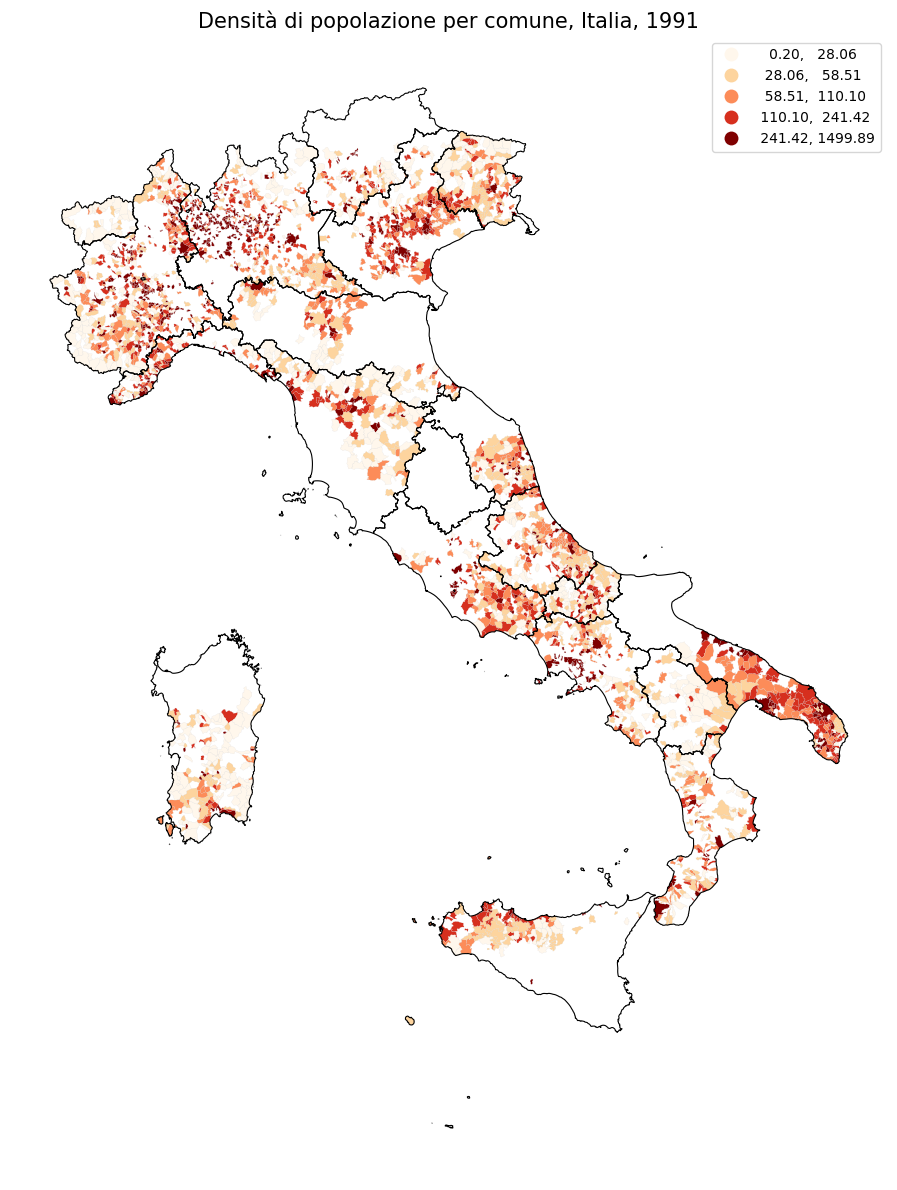

In [ ]:
# Mappa
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# coropletica comuni (Le mappe coropletiche vengono utilizzate per esempio per mostrare su una mappa la densità di popolazione o la distribuzione del reddito pro capite)
comuni_plot.plot(
    column="dens_1991",
    cmap="OrRd",
    scheme="Quantiles",
    k=5,
    legend=True,
    edgecolor="lightgrey",   # contorni comunali sottili
    linewidth=0.1,
    ax=ax,
    missing_kwds={"color": "white", "label": "No data"}
)

# contorno regioni più marcato
regioni.boundary.plot(ax=ax, color="black", linewidth=0.8)

ax.set_axis_off()
ax.set_title("Densità di popolazione per comune, Italia, 1991", fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
# aggiungo ferrovie secondarie georeferenziate
import geopandas as gpd
ferrovie_secondarie = gpd.read_file("export.geojson")

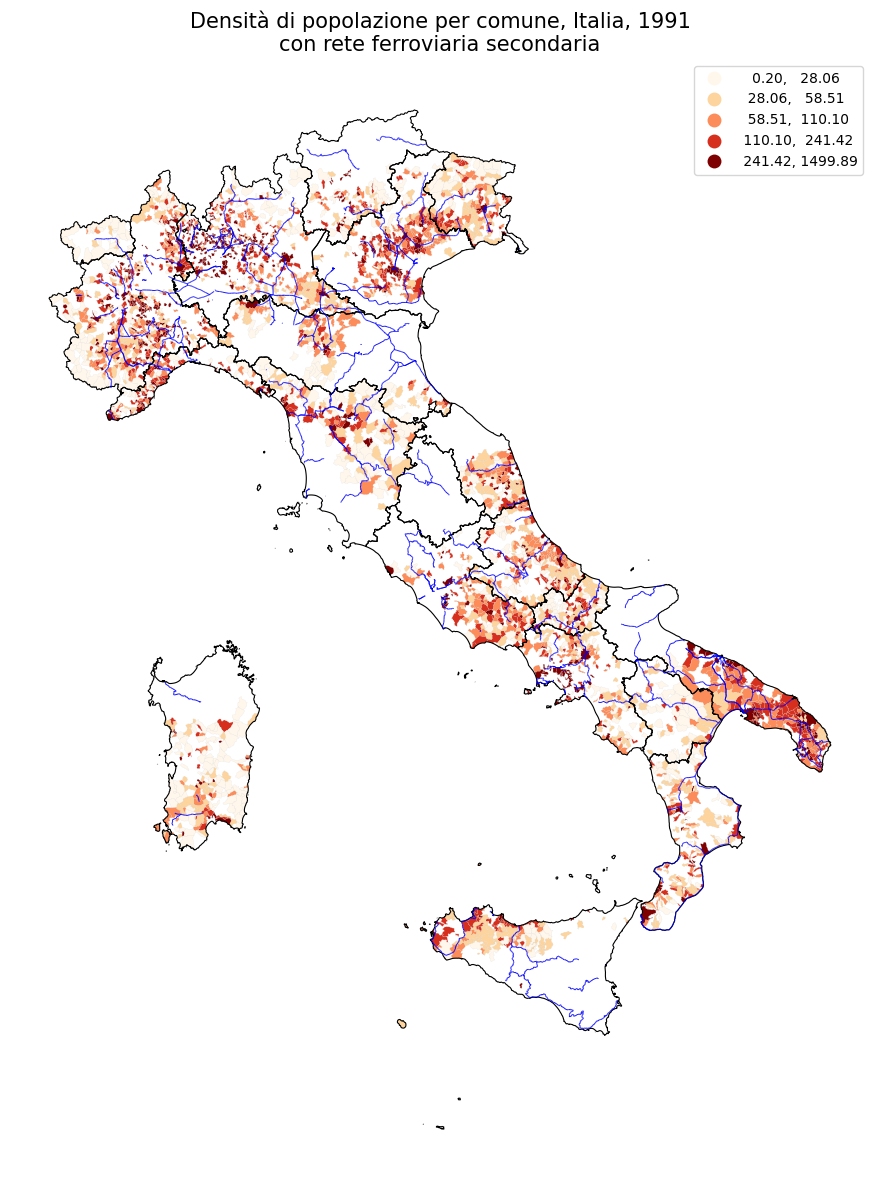

In [ ]:
# Inserisco nel plot le ferrovie secondarie georeferenziate
ferrovie_secondarie = ferrovie_secondarie.to_crs(comuni_1991.crs)

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

ax = comuni_plot.plot(
    column="dens_1991",
    cmap="YlOrRd",         # o 'OrRd', 'Blues', 'viridis'
    scheme="Quantiles",
    k=5,
    legend=True,
    linewidth=0.1,
    ax=ax,
    edgecolor="lightgrey",
    missing_kwds={"color": "white", "label": "No data"}
)

regioni.boundary.plot(ax=ax, color="black", linewidth=0.8)

ferrovie_secondarie.plot(ax=ax, color="blue", linewidth=0.7, alpha=0.9)
ax.set_axis_off()
ax.set_axis_off()
ax.set_title("Densità di popolazione per comune, Italia, 1991\ncon rete ferroviaria secondaria", fontsize=15)
plt.tight_layout()
plt.show()

Il codice sembrerebbe funzionare. Il risultato mostra una mappa italiana correttamente creata, con contorni comunali e regionali corretti. Inoltre le aree dove si trovano le ferrovie inserite sono corrette.
Alcuni risultati interessanti sono già visibili. In alcune aree, come il sud sardegna, parti della toscana, e comunque nei punti della mappa dove sono correttamente visibili le popolazioni, si può notare come la vicinanza della ferrovia sia correlata ad aree più scure (quindi con popolazioni maggiori) non solo nelle aree intermedie ma in particolare nei punti di arrivo o partenza.
Permangono tuttavia alcuni problemi.
Occorre sicuramente migliorare i dati della popolazione oltre che aggiungere altre georeferenziazioni di ferrovie secondarie non presenti nel file utilizzato. Questi due problemi verranno risolti in futuri aggiornamenti del codice.